## Using matplotlib

Many of the examples in this lab session are taken from the matplotlib tutorials.

Get the counts of the words in *Emma* by Jane Austen.  Lower case the input words.  Do a histogram of the word counts for the 100 most frequent words.   You'll nneed to use the `most_common` method on a Counter, which, if given the argument 100, returns a list of the word count pairs for the 100 most common words.  You should try 20 bins.
You can also experiment wth doing all the words.

In [ ]:
import urllib.request
with urllib.request.urlopen(\
  'http://gawron.sdsu.edu/python_for_ss/emma.txt') \
   as response:
   data = response.read()

In [ ]:
data[:100]

b'\xef\xbb\xbfThe Project Gutenberg EBook of Emma, by Jane Austen\r\n\r\nThis eBook is for the use of anyone anywhe'

In [ ]:
type(data)

bytes

In [ ]:
data1 = data.decode(encoding='utf16')

In [ ]:
type(data1)

str

In [ ]:
data1[:100]

'믯咿敨倠潲敪瑣䜠瑵湥敢杲䔠潂歯漠\u2066浅慭\u202c祢䨠湡\u2065畁瑳湥\u0a0d\u0a0d桔獩攠潂歯椠\u2073潦\u2072桴\u2065獵\u2065景愠祮湯\u2065湡睹敨敲愠⁴潮挠獯⁴湡\u2064楷桴\u0a0d污潭瑳渠\u206f敲瑳楲瑣潩獮眠慨獴敯敶\u2e72†潙⁵慭⁹潣祰椠ⱴ朠癩\u2065瑩愠慷⁹牯\u0a0d敲甭敳'

In [ ]:
data1 = data.decode(encoding='utf8')

In [ ]:
data1[:100]

'\ufeffThe Project Gutenberg EBook of Emma, by Jane Austen\r\n\r\nThis eBook is for the use of anyone anywhere'

Here is the code that needs to be modified.

In [ ]:
import nltk

In [ ]:
nltk.__version__

'3.2.5'

In Google Colab, be sure to do this download first.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
# decode
data0 = data.decode(encoding='utf8')
datal = data0.lower()  # 
# Note. We're not using split anymore
data_lt =  word_tokenize(datal)  #data1.lower().split()
## This needs to change We're not doing word counts for Sl anymore
word_cts = Counter(data_lt)

In [ ]:
word_cts.most_common(30)

[(',', 12164),
 ('.', 6439),
 ('the', 5373),
 ('to', 5259),
 ('and', 4943),
 ('of', 4403),
 ('a', 3181),
 ('i', 3164),
 ('--', 3102),
 ('it', 2515),
 ('her', 2446),
 ("''", 2429),
 ('was', 2397),
 (';', 2353),
 ('she', 2336),
 ('not', 2304),
 ('in', 2231),
 ('you', 2032),
 ('be', 1989),
 ('that', 1819),
 ('he', 1808),
 ('``', 1782),
 ('had', 1623),
 ('as', 1446),
 ('but', 1444),
 ('for', 1372),
 ('have', 1324),
 ('is', 1266),
 ('with', 1262),
 ('very', 1203)]

In [ ]:
word_cts.most_common(2000)[-20:]

[('possession', 6),
 ('attempted', 6),
 ('pressing', 6),
 ('containing', 6),
 ('skill', 6),
 ('variety', 6),
 ('baby', 6),
 ('offence', 6),
 ('entreaties', 6),
 ('anxiously', 6),
 ('slowly', 6),
 ('doubts', 6),
 ('prefer', 6),
 ('waited', 6),
 ('result', 6),
 ('suspense', 6),
 ('opposing', 6),
 ('censure', 6),
 ('sentence', 6),
 ('original', 6)]

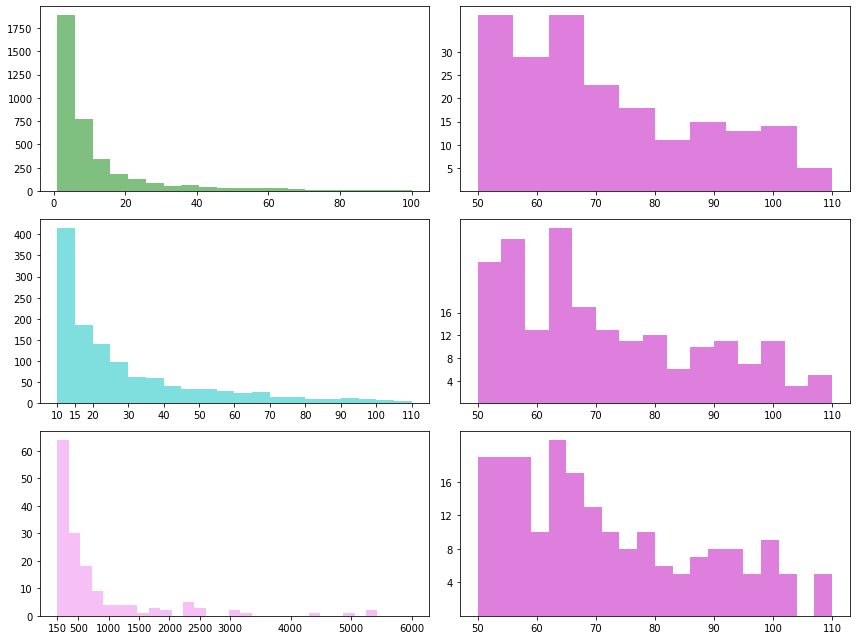

In [ ]:
from matplotlib import pyplot as plt
x = sorted(list(dict(word_cts.most_common(4000)).values()))
#Let's try three different plots
# First plot only the very top of the freq range
fig, axes = plt.subplots(3, 2,figsize=(12,9))
## Need to think about how many bars/bins we want
n1, bins1, patches1 = axes[0,0].hist(x, 20, facecolor='g', 
                                   range =(1,100),
                                   alpha=0.5)
# Same freq range, shift bin placment 
axes[1,0].set_xticks([10,15,20,30,40,50,60,70,80,90,100,110])
n2, bins2, patches2 = axes[1,0].hist(x, 20, facecolor='c', 
                              alpha=0.5, range=(10,110))
# Check out a much larger freq range.  Many more bins needed. 
# Using Freeman-Diaconis ('fd') estimator for bin edge determination
axes[2,0].set_xticks([150,500,1000,1500,2000,2500,3000,4000,5000,6000])
n2, bins2, patches2 = axes[2,0].hist(x, 'fd', facecolor='violet', 
                              alpha=0.5, range=(150,6000))
###############################################################
axes[0,1].set_xticks([50,60,70,80,90,100,110])
axes[0,1].set_yticks([5,10,15,20,25,30])
n3, bins3, patches3 = axes[0,1].hist(x, 10, facecolor='m', 
                              alpha=0.5, range=(50,110))
# 15 bins. bumpier
axes[1,1].set_xticks([50,60,70,80,90,100,110])
axes[1,1].set_yticks([4,8,12,16])
n4, bins4, patches4 = axes[1,1].hist(x, 15, facecolor='m', 
                              alpha=0.5, range=(50,110))

# 20 bins. much bumpier
axes[2,1].set_xticks([50,60,70,80,90,100,110])
axes[2,1].set_yticks([4,8,12,16])
n5, bins5, patches5 = axes[2,1].hist(x, 20, facecolor='m', 
                              alpha=0.5, range=(50,110))
# Although the function name suggests otherwise, this spreads out the aubplots
fig.tight_layout()

Heights in last plot, first col.

In [ ]:
n2

array([64., 30., 18.,  9.,  4.,  4.,  4.,  1.,  3.,  2.,  0.,  5.,  3.,
        0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  2.,  0.,  0.,  0.])

Intervals for bins

In [ ]:
widths = [bins2[i] - bins2[i-1] for i in range(1,len(bins2))]

min(widths),max(widths)

(188.7096774193542, 188.7096774193551)

In [ ]:
print(data_lt[1020:1100])
data2 = ' '.join(data_lt[1020:1100])
print(data2[:201])

['brought', 'the', 'next', 'visit', 'from', 'isabella', 'and', 'her', 'husband', ',', 'and', 'their', 'little', 'children', ',', 'to', 'fill', 'the', 'house', ',', 'and', 'give', 'her', 'pleasant', 'society', 'again', '.', 'highbury', ',', 'the', 'large', 'and', 'populous', 'village', ',', 'almost', 'amounting', 'to', 'a', 'town', ',', 'to', 'which', 'hartfield', ',', 'in', 'spite', 'of', 'its', 'separate', 'lawn', ',', 'and', 'shrubberies', ',', 'and', 'name', ',', 'did', 'really', 'belong', ',', 'afforded', 'her', 'no', 'equals', '.', 'the', 'woodhouses', 'were', 'first', 'in', 'consequence', 'there', '.', 'all', 'looked', 'up', 'to', 'them']
brought the next visit from isabella and her husband , and their little children , to fill the house , and give her pleasant society again . highbury , the large and populous village , almost amounting


Ldet's try something quite different.  We will
just plot word frequencies directly, placing the  wordswith the highest frequencies on the left.  The y-axis will be the word frequencies.  The x-axis will just
be the integers, so we can think of the x-axis as the word **rank**.  The number one rank word (the most frequent) has frequency 12,164.  The lowest rank word in our set
of 5_000 has frequency 1.

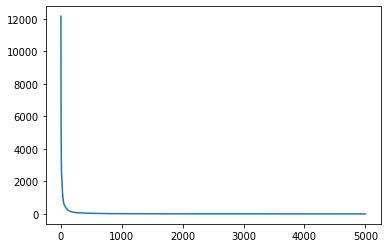

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

N = 5_000
y = sorted(list(dict(word_cts.most_common(N)).values()),reverse=True)
x = np.array(range(N))
plt.plot(x,y)


Hmm, nice, but not very informative.  The values
drop so quickly.  Let's put the y-axis on a **log scale**.
That means we place frequencies $10^1$, $10^2$, $10^3$,
and $10^4$ equal distances apart on the y axis.  The plot
now looks like this.


Zipf's Law

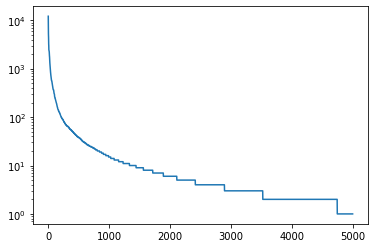

In [ ]:
plt.yscale('log')
plt.plot(x,y)

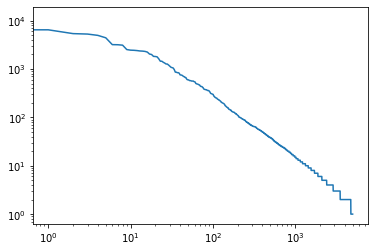

In [ ]:
plt.yscale('log')
plt.xscale('log')
plt.plot(x,y)

What we're seeing is called Zipf's Law:
the frequency of any word is very roughly inversely proportional to its rank. The precise
statement involves what is called a power law distribution which we won't go into here.  What we see in our data
is a very rapid drop off in frequency.  The most common word
is roughly twice as frequent as the 7th ranked word,
which is about twicce as frequent as the 22nd ranked word,
and so on.

```
1.  'the'  5373
2.  'to'   5259
3.  'and'  4943
4.  'of'   4403
5.  'a'    3181
6.  'i'    3164
7.  'it'   2515
8.  'her'  2446
9.  'was'  2397
10. 'she'  2336
11. 'not'  2304
12. 'in'   2231
13. 'you'  2032
14. 'be'   1989
15. 'that' 1819
16. 'he'   1808
17. 'had'  1623
18. 'as'   1446
19. 'but'  1444
20. 'for', 1372
21. 'have' 1324
22. 'is'   1266
``

The law is named after the American linguist George Kingsley Zipf (1902–1950), who tried to explain it (Zipf 1935, 1949).


## Other matplotlib features

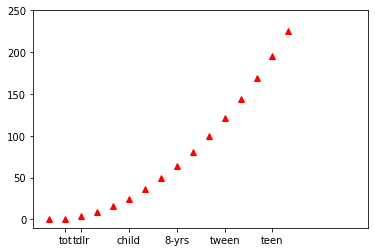

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,16)
# 'ro' Draw individual red points ('r') using circular markers 'o'
#plt.plot(x, x**2, 'ro')
#plt.plot(x, x**2, 'r-')
#plt.plot(x, x**2)
plt.plot(x, x**2, 'r^')
plt.xticks([1,2,5,8,11,14],'tot tdlr child 8-yrs tween teen'.split())
# Axis means the x, y axes together: One plotting box
# xmin, xmax, ymin, ymax
bds = [-1, 20, -10, 250]
_ = plt.axis(bds)

#### randomly generated data

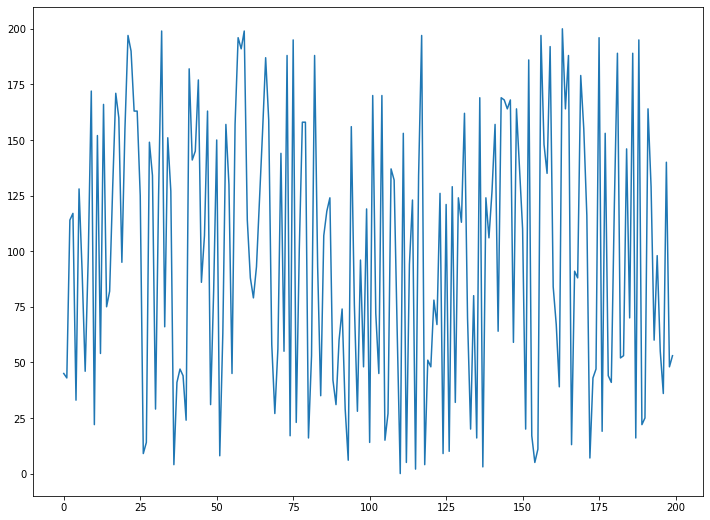

In [ ]:
import random
fig, ax = plt.subplots(1, 1,figsize=(12,9))
b = 200
x = np.arange(b)
y = [random.randint(0,b) for i in range(b)]
ax.plot(x, y)
#ax.scatter(x, y)

Now we'll try a similar plot, but using a function to provide the
y points.

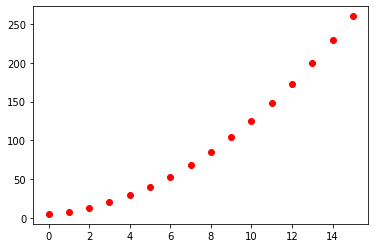

In [ ]:
x = np.arange(0,16)
f = lambda x: x**2 + 2*x + 5

# 'ro' Draw individual red points ('r') using circular markers 'o'
line, = plt.plot(x, f(x), 'ro')

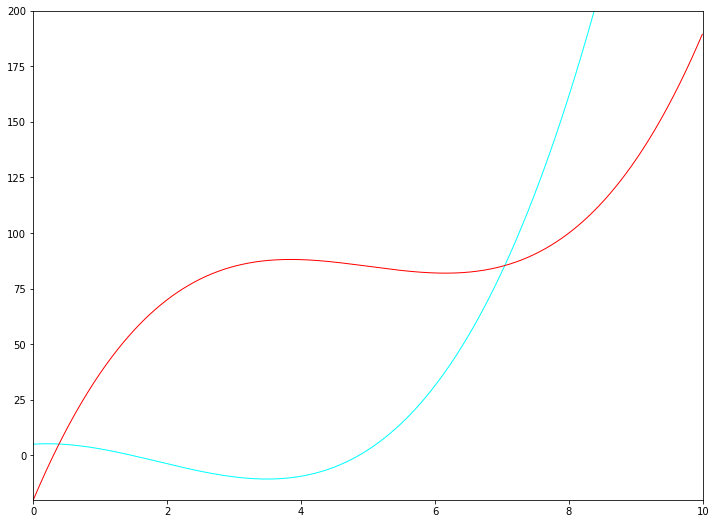

In [ ]:
import numpy as np
fig, ax = plt.subplots(1, 1,figsize=(12,9))
def func(x):
    return (x-3)*(x-5)*(x-7)+85
f = lambda x: .9* x**3 -5*x**2 + 2*x + 5

# Compare x = np.linspace(0,10, 101)
x = np.arange(0, 10, 0.01)
# (x_min, x_max, y_min, y_max)
plt.axis([0, 10, -20, 200])
line, = ax.plot(x, f(x), linewidth=1,color='cyan')
line2, = ax.plot(x, func(x), linewidth=1,color='red')


#### creating xvals (arange vs. linspace)

In [ ]:
print('np.arange(0, 10, 0.01)', len(x))
print(x[:50], x[-1])
print()
x2 = np.linspace(0, 10, 1000)
print( 'np.linspace(0, 10, 1000)',len(x2))
print(x2[:50], x2[-1])

np.arange(0, 10, 0.01) 1000
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49] 9.99

np.linspace(0, 10, 1000) 1000
[0.         0.01001001 0.02002002 0.03003003 0.04004004 0.05005005
 0.06006006 0.07007007 0.08008008 0.09009009 0.1001001  0.11011011
 0.12012012 0.13013013 0.14014014 0.15015015 0.16016016 0.17017017
 0.18018018 0.19019019 0.2002002  0.21021021 0.22022022 0.23023023
 0.24024024 0.25025025 0.26026026 0.27027027 0.28028028 0.29029029
 0.3003003  0.31031031 0.32032032 0.33033033 0.34034034 0.35035035
 0.36036036 0.37037037 0.38038038 0.39039039 0.4004004  0.41041041
 0.42042042 0.43043043 0.44044044 0.45045045 0.46046046 0.47047047
 0.48048048 0.49049049] 10.0


## Subplots, Axis boundaries

An older way of introducing subplots, which creates them one by one.

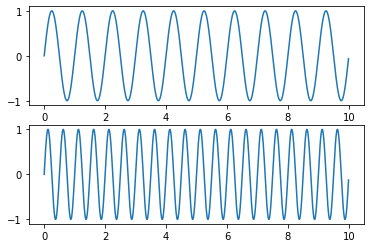

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 10, 0.01)
ax1 = plt.subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(t, np.sin(4*np.pi*t))


The plots are displayed with shared axes.  This means they share the same
bounds and the same tick marks.  It also means that when you zoom in
on one (using the "zoom to rectangle" button in the tool bar [magnifying glass icon]),
the zoom will happen in both plots simultaneously.

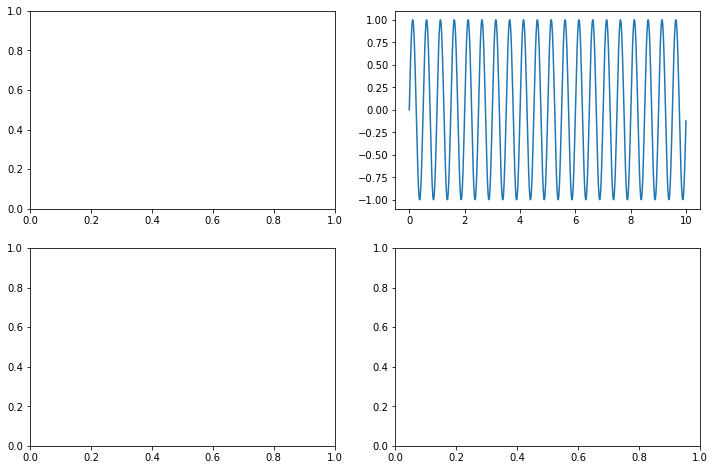

In [ ]:
# clear the state for context use below
plt.close('all')
# old style
# Note figsize param
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
t = np.arange(0, 10, 0.01)
ax2.plot(t,np.sin(4*np.pi*t))

A newer way which introduces them all at once.  If you create them all at once and want to
share axes.  It is a good idea (especially with shared axes) to provide axes limits that will suit all
the data you wish to display.

/Users/gawron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


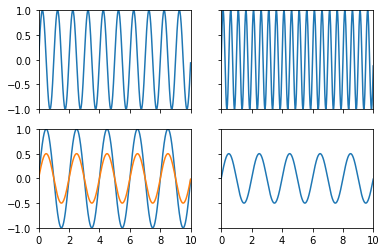

In [ ]:
plt.close('all')
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
((ax1, ax2), (ax3, ax4)) = axes
t = np.arange(0, 10, 0.01)
# Carefully chosen axis limits
ax1.axis([0,10,-1,1.0])
ax1.plot(t, np.sin(2*np.pi*t))
ax2.plot(t,np.sin(4*np.pi*t))
ax3.plot(t,np.sin(np.pi*t))
ax3.plot(t,.5 * np.sin(np.pi*t))
ax4.plot(t,.5 * np.sin(np.pi*t))
fig.show()

The nice thing about this style of plotting is that the axes and figure are explicit objects, each with its
own explicit variable name.  You can set various
features for all the axes and the figure by using those variables (*fig*, *ax1*, etcetera).  For many programmers, this
is a more intuitive way to program. Since there can be multiple figures, as well as multiple objects,  keeping things
straight without explicit variable names can be difficult.  

## A simpler histogram

In [ ]:
x[:50]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

Choose N points from a normal dist with std 1.0 centered on 0.

In [ ]:
N = 1_000
pts = np.random.randn(N)
std_dev = np.std(pts)

pts.mean(),(pts**2).sum(),std_dev

(0.025949099678216125, 1047.0139521985393, 1.022907911996202)

In [ ]:
x.std()

14.959135928740334

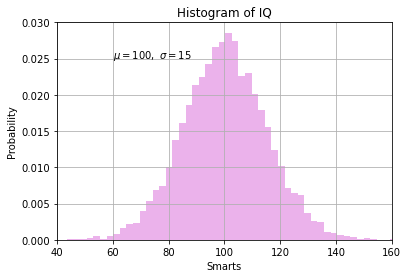

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')
# Select mean and std
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, facecolor='m', 
                            density=True,alpha=0.3)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# Place a text annotation at a desired location
# Note use of Latex style Greek letters
plt.text(60, .025, f'$\mu={mu},\ \sigma={sigma}$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
#plt.show()

## Setting line attributes

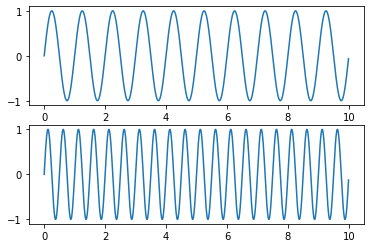

In [ ]:
t = np.arange(0, 10, 0.01)
ax1 = plt.subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(t, np.sin(4*np.pi*t))


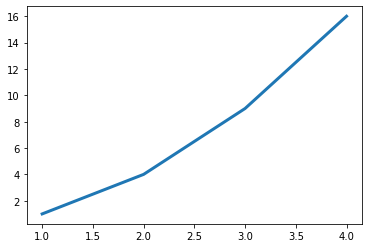

In [ ]:
x = [1,2,3,4]
y = [1,4,9,16]
line, = plt.plot(x, y, linewidth=3.0)

The comma here after *line* is due to the fact that *plot* returns a tuple;
in this case it is a 1-tuple, so we just set line to the first member.  

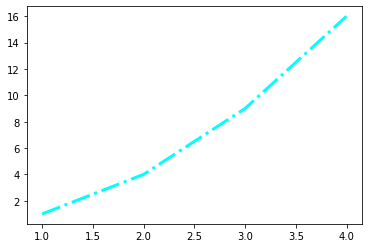

In [ ]:
plt.close('all')
line, = plt.plot(x, y, linewidth=3.0,linestyle='-.',color='cyan')

Now we can set line attributes.

In [ ]:

plt.setp(line)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: colo

The next example shows alternative ways to set line styles.  The plot command on line 12 sets up
two plots simultaneously on the same axis.  The first is a plot of the function *f* defined
in lines 4 and 5, over the x range [0,5] because of how *t1* is defined on line 7.  The 'bo'
specification sets the line style of that plot.  The line will be a curve traced by small blue circles
('b' = 'blue' and 'o' = the circle marker style).  That plot is rather coarse because *t1* is defined 
to have points only at intervals of *t1*.  The plot defined using *t2* is over the same
interval, but it will be much finer-grained because points are placed at intervals of
'.02'.  The line style 'k' is just a black solid line.  In the second axis, the line
style 'r--' gives a red dashed line.


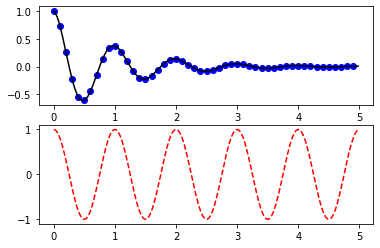

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## Multiple figures simultaneously

`matplotlib` has a notion of the current context.

The comtext-based style of coding
can be quite hard to read if you're not use to it.

The next cell contains commands for creating two figure windows, each
containing distinct subplots.  Two windows pop up.  Each can be killed
separately.

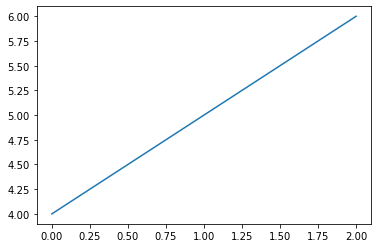

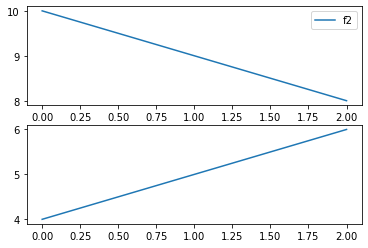

In [ ]:
import matplotlib.pyplot as plt
fig1 = plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1,2,3],label='z')
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4,5,6],label='y')

fig2 = plt.figure(2)                # a second figure
plt.plot([4,5,6],label='y')            # creates a subplot(111) by default

plt.figure(1)                # Go back figure 1; subplot(212) still current
plt.subplot(211,label='x')             # make ax subplot(211) in fig 1 current
plt.plot([10,9,8],label='f2')                     # overwrite previous plot
plt.legend()

## Using text

Matplotlib offers extensive label customization facilities, as in the following
elaborate example taken from a StackOverflow post by unubtu.

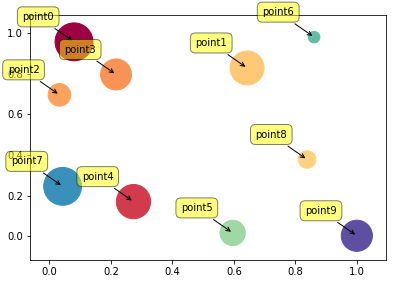

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
data = np.random.random((N, 4))
labels = ['point{0}'.format(i) for i in range(N)]
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker = 'o', c = data[:, 2], s = data[:, 3]*1500,
    cmap = plt.get_cmap('Spectral'))
for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


## Reading in some data

Get the counts of the words in S.  Lower case the input words.

In [ ]:
from collections import Counter
S = """The good boys do fine always 
       when the good is easy and the bad 
       is hard and the boys are the girls."""
Sl = S.lower().split()
word_cts = Counter(Sl)

In [ ]:
set(word_cts.values())

{1, 2, 5}

Do a histogram of the word counts.

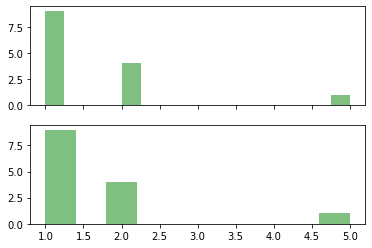

In [ ]:
#word_cts.most_common(5)
x = list(word_cts.values())
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
n, bins, patches = axes[0].hist(x, 16, facecolor='g', 
                              alpha=0.5)
n, bins, patches = axes[1].hist(x, 10, facecolor='g', 
                              alpha=0.5)

We can improve all our NLP work by using a tokenizer.

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
Sl = S.lower()  # 
# The next line needs to change.  We're not using split anymore 
# to tokenize
S_lt = word_tokenize(Sl)
## The next line needs to change We're not doing word counts for Sl anymore
word_cts = Counter(S_lt)

In [ ]:
S_lt

['the',
 'good',
 'boys',
 'do',
 'fine',
 'always',
 'when',
 'the',
 'good',
 'is',
 'easy',
 'and',
 'the',
 'bad',
 'is',
 'hard',
 'and',
 'the',
 'boys',
 'are',
 'the',
 'girls',
 '.']

Get the counts of the words in *Emma* by Jane Austen.  Lower case the input words.  Do a histogram of the word counts for the 100 most frequent words.   You'll nneed to use the `most_common` method on a Counter, which, if given the argument 100, returns a list of the word count pairs for the 100 most common words.  You should try 20 bins.
You can also experiment wth doing all the words.

In [ ]:
import urllib.request
with urllib.request.urlopen(\
  'http://gawron.sdsu.edu/python_for_ss/emma.txt') \
   as response:
   data = str(response.read())

Here is the code we used above, which needs to be modified.

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
datal = data.lower()  # 
# The next line needs to change.  We're not using split anymore 
# to tokenize
data_lt = word_tokenize(datal)
## The next line needs to change We're not doing word counts for Sl anymore
word_cts = Counter(data_lt)

Counter({"b'\\xef\\xbb\\xbfthe": 1,
         'project': 68,
         'gutenberg': 22,
         'ebook': 10,
         'of': 3841,
         'emma': 591,
         ',': 12164,
         'by': 520,
         'jane': 237,
         'austen\\r\\n\\r\\nthis': 1,
         'is': 1138,
         'for': 1198,
         'the': 4479,
         'use': 43,
         'anyone': 4,
         'anywhere': 15,
         'at': 899,
         'no': 656,
         'cost': 5,
         'and': 4256,
         'with\\r\\nalmost': 2,
         'restrictions': 2,
         'whatsoever': 2,
         '.': 5380,
         'you': 1802,
         'may': 207,
         'copy': 11,
         'it': 2200,
         'give': 139,
         'away': 117,
         'or\\r\\nre-use': 2,
         'under': 60,
         'terms': 27,
         'license': 11,
         'included\\r\\nwith': 2,
         'this': 476,
         'or': 498,
         'online': 4,
         'www.gutenberg.org\\r\\n\\r\\n\\r\\ntitle': 1,
         ':': 195,
         'emma\\r\\n\\r\\nau

To do the histogram for the 100 most common words, we need to find
the 100 most common words.  Use `most_common`.

In [ ]:
list(zip(*word_cts.most_common(100)))[1]

(12164,
 5372,
 4667,
 4479,
 4256,
 3841,
 3102,
 2896,
 2795,
 2494,
 2353,
 2200,
 2089,
 2068,
 2032,
 2025,
 1939,
 1802,
 1730,
 1717,
 1580,
 1568,
 1383,
 1288,
 1275,
 1198,
 1148,
 1138,
 1135,
 1078,
 1064,
 1021,
 960,
 899,
 848,
 845,
 831,
 763,
 722,
 712,
 656,
 654,
 638,
 635,
 621,
 609,
 596,
 591,
 568,
 520,
 520,
 518,
 508,
 498,
 495,
 495,
 494,
 478,
 476,
 471,
 467,
 461,
 459,
 459,
 449,
 424,
 423,
 417,
 400,
 398,
 388,
 387,
 378,
 364,
 353,
 348,
 345,
 343,
 337,
 332,
 326,
 325,
 325,
 325,
 325,
 315,
 312,
 309,
 303,
 298,
 291,
 289,
 282,
 279,
 278,
 277,
 266,
 265,
 261,
 247)

In [ ]:
x

[5, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1]

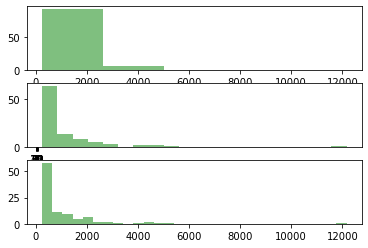

In [ ]:
#THis is all the words, not 100 most common.  Change.
x = list(zip(*word_cts.most_common(100)))[1] # list(word_cts.values())
#Let's try three different plots  Fill in as many as you like.
fig, axes = plt.subplots(3, 1)
## Need to think about how many bars/bins we want
n1, bins1, patches1 = axes[0].hist(x, 5, facecolor='g', 
                                   alpha=0.5)
# These are customizable as well.
axes[1].set_yticks([0,50,100,150,200])
L = axes[1].set_xticks([10,15,20,30,40,50,60,70,80])
n1, bins1, patches1 = axes[1].hist(x, 20, facecolor='g', 
                                  #range =(1,100),
                                   alpha=0.5)
n1, bins1, patches1 = axes[2].hist(x, 30, facecolor='g', 
                                  #range =(1,100),
                                   alpha=0.5)

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
datal = data.lower()  # 
# The next line needs to change.  We're not using split anymore
data_lt =  word_tokenize(datal)  #data1.lower().split()
## The next line needs to change We're not doing word counts for Sl anymore
word_cts = Counter(data_lt)

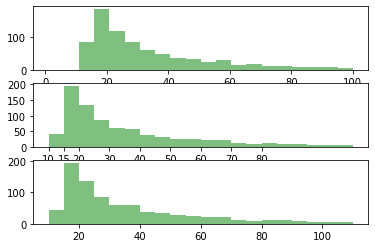

In [ ]:
x = dict(word_cts.most_common(1000)).values()
#Let's try two different plots
fig, axes = plt.subplots(3, 1)
## Need to think about how many bars/bins we want
n1, bins1, patches1 = axes[0].hist(x, 20, facecolor='g', 
                                   range =(1,100),
                                   alpha=0.5)
axes[1].set_yticks([0,50,100,150,200])
axes[1].set_xticks([10,15,20,30,40,50,60,70,80])
n2, bins2, patches2 = axes[1].hist(x, 20, facecolor='g', 
                              alpha=0.5, range=(10,110))
n2, bins2, patches2 = axes[2].hist(x, 20, facecolor='g', 
                              alpha=0.5, range=(10,110))